In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from datetime import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import pytz


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indicium-teste-seleo-analista/colaborador_agencia.csv
/kaggle/input/indicium-teste-seleo-analista/colaboradores.csv
/kaggle/input/indicium-teste-seleo-analista/propostas_credito.csv
/kaggle/input/indicium-teste-seleo-analista/agencias.csv
/kaggle/input/indicium-teste-seleo-analista/contas.csv
/kaggle/input/indicium-teste-seleo-analista/clientes.csv
/kaggle/input/indicium-teste-seleo-analista/transacoes.csv


# Importando arquivos

## Agências

In [3]:
df_agencias = pd.read_csv("/kaggle/input/indicium-teste-seleo-analista/agencias.csv",index_col='cod_agencia')
print(f"Quantidade de Agências: {df_agencias.shape[0]}")
df_agencias

Quantidade de Agências: 10


,nome,endereco,cidade,uf,data_abertura,tipo_agencia
cod_agencia,,,,,,
7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física
5,Agência Porto Alegre,"Av. Bento Gonçalves, 1924 - Partenon, Porto Al...",Porto Alegre,RS,2013-12-01,Física
6,Agência Rio de Janeiro,"R. Sen. Dantas, 15 - Centro, Rio de Janeiro - ...",Rio de Janeiro,RJ,2015-04-01,Física
8,Agência Jardins,"Av. Brg. Faria Lima, 2491 - Jardim Paulistano,...",São Paulo,SP,2018-01-09,Física
9,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física


## Clientes

In [4]:
df_clientes = pd.read_csv("/kaggle/input/indicium-teste-seleo-analista/clientes.csv",
                          index_col='cod_cliente')
print(f"Quantidade de Clientes: {df_clientes.shape[0]}")
df_clientes.sample(n=10)

Quantidade de Clientes: 998


,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
cod_cliente,,,,,,,,,
407,Eduardo,Vieira,vitor-gabrielduarte@example.org,PF,2019-05-18 13:18:00 UTC,198.203.467-03,1953-04-25,"Passarela Marcelo Silva, 1 Esperança 85057312 ...",11102-836
953,Miguel,Vieira,lucas-gabriel49@example.com,PF,2015-06-11 15:05:00 UTC,049.571.362-70,1950-12-13,"Sítio Emanuella Araújo, 14 Vila Jardim Alvorad...",08810805
402,Maria Eduarda,da Rocha,isaacfarias@example.org,PF,2021-07-15 12:44:00 UTC,579.820.436-74,1948-06-10,"Trevo de Ribeiro, 45 Ouro Preto 65293730 Viana...",93842428
188,Bárbara,Santos,benjaminmoreira@example.org,PF,2022-11-12 14:02:00 UTC,496.325.108-60,1951-07-06,"Sítio de Sales, 90 Pongelupe 09139183 Pereira ...",23499-744
951,Matheus,Teixeira,helenaalmeida@example.org,PF,2018-11-19 11:53:00 UTC,065.184.729-01,1955-07-21,"Trecho Viana, 7 Corumbiara 51229-101 da Costa ...",20530-830
508,Catarina,Nogueira,brendaalmeida@example.net,PF,2019-05-18 14:07:00 UTC,269.031.847-40,1962-02-17,"Setor de Rezende, 1 Maria Tereza 91022434 Gonç...",37113-152
891,Gustavo Henrique,Freitas,oliveirahenrique@example.net,PF,2012-02-20 13:42:00 UTC,126.094.378-03,1982-02-05,"Parque de da Paz, 8 Vila Dos Anjos 71773-667 d...",45295-653
572,Fernando,da Costa,eloah44@example.com,PF,2021-09-21 16:34:00 UTC,859.712.406-76,1961-12-22,"Travessa Elisa Lopes, 37 Vila Nova Gameleira 1...",57985897
691,Raquel,Melo,thiago84@example.net,PF,2020-07-15 16:46:00 UTC,874.351.602-53,1978-08-21,Sítio Enzo Fernandes Madre Gertrudes 07858527 ...,51214338


Verifica-se a coluna "cep" com formatos variados, a serem tratados futuramente.

## Colaboradores

In [5]:
df_colaboradores = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/colaboradores.csv')
print(f'Quantidade de colaboradores: {df_colaboradores.shape[0]}')
df_colaboradores.head()

Quantidade de colaboradores: 100


,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep
0,14,Paulo,Dias,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674
1,19,Luiz Fernando,Dias,pcunha@example.net,820.415.963-33,1994-07-10,"Ladeira de Moreira, 82 Jardim Atlântico 27617-...",50013962
2,32,Vitor Hugo,Dias,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215
3,88,João Gabriel,Lima,luiz-otaviorezende@example.org,967.082.451-67,1994-10-19,"Trevo Murilo Ramos, 92 São Benedito 73615-597 ...",24224-305
4,39,Maria Eduarda,Melo,joao-pedro72@example.com,857.496.210-49,1996-03-01,"Parque de Moura, 65 Granja Werneck 67769059 da...",96896390


## Agência de lotação dos colaboradores 

In [6]:
df_colaborador_agencia = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/colaborador_agencia.csv')
print(f'Quantidade de colaboradores: {df_colaborador_agencia.shape[0]}')
df_colaborador_agencia.head()


Quantidade de colaboradores: 100


,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1


Nota-se que esta planilha possui uma linha para cada código de colaborador da base de dados anterior e cada um deles está vinculado a uma agência.

## Contas bancárias


In [7]:
df_contas = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/contas.csv')
print(f'Quantidade de contas abertas: {df_contas.shape[0]}')
df_contas.sample(10)

Quantidade de contas abertas: 999


,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
726,673,673,7,64,PF,2016-09-09 14:30:00 UTC,92837.5870,86746.66,2022-08-19 17:46:19 UTC
374,630,630,5,10,PF,2014-07-02 12:56:00 UTC,799.2930,698.33,2022-12-03 10:49:57 UTC
111,232,232,1,83,PF,2013-11-27 16:57:00 UTC,117243.3034,110336.89,2020-07-24 08:10:00 UTC
293,866,866,3,98,PF,2019-06-22 13:36:00 UTC,4.3416,624.82,2022-12-30 00:00:00.276554 UTC
774,349,349,7,84,PF,2019-01-07 15:47:00 UTC,28053.5890,26634.40,2022-12-29 23:14:40 UTC
840,396,396,7,85,PF,2021-09-24 11:11:00 UTC,7540.1086,7091.65,2022-12-30 00:00:00.66657 UTC
969,111,111,9,11,PF,2021-11-02 11:34:00 UTC,8803.3514,8911.52,2022-12-30 00:00:00.70592 UTC
669,647,647,7,48,PF,2018-12-19 13:08:00 UTC,143.4300,118.65,2021-11-07 20:51:03 UTC
108,119,119,1,83,PF,2020-01-14 10:20:00 UTC,27043.2783,26165.99,2022-10-26 06:36:27 UTC
904,594,594,7,86,PF,2019-11-26 14:01:00 UTC,1648.6180,1131.10,2022-11-27 00:35:22 UTC


Como foi observado que são 998 clientes cadastrados e 999 contas, pelo menos um cliente possui mais d euma conta bancária cadastrada.

## Propostas de crédito

In [8]:
df_credito = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/propostas_credito.csv')
df_credito = df_credito.set_index(df_credito['cod_proposta'])
print(f'Quantidade de propostas de crédito cadastradas: {df_credito.shape[0]}')
df_credito

Quantidade de propostas de crédito cadastradas: 2000


,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta
cod_proposta,,,,,,,,,,,,
116,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,0,Enviada
715,715,45,1,2021-06-17 13:09:32 UTC,0.0131,12897.538285,19848.55,6951.011715,232.124685,100,1,Enviada
755,755,494,1,2021-08-10 04:24:02 UTC,0.0203,122236.312551,187154.36,64918.047449,3673.518951,56,0,Enviada
953,953,381,1,2011-02-23 07:57:58 UTC,0.0167,47784.649757,59530.61,11745.960243,955.041560,109,3,Enviada
1046,1046,176,1,2010-11-15 16:03:28 UTC,0.0211,178393.038243,214294.19,35901.151757,10219.659415,22,4,Enviada
...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1758,176,99,2010-01-10 08:12:47 UTC,0.0133,96404.111608,184043.36,87639.248392,1673.386037,110,6,Validação documentos
582,582,241,100,2019-02-25 05:03:22 UTC,0.0151,61292.834593,82684.29,21391.455407,2219.574245,36,2,Validação documentos
970,970,106,100,2011-06-05 04:13:16 UTC,0.0225,100371.681790,152272.50,51900.818210,3482.000980,47,2,Validação documentos


## Transações bancárias

In [9]:
df_transacoes = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/transacoes.csv')
print(f'Quantidade de transações cadastradas: {df_transacoes.shape[0]}')
df_transacoes

Quantidade de transações cadastradas: 71999


,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0
...,...,...,...,...,...
71994,17007,764,2022-12-29 23:59:59.746608 UTC,Transferência entre CC - Crédito,82.3
71995,22320,764,2022-12-29 23:59:59.055028 UTC,Transferência entre CC - Crédito,414.8
71996,8697,509,2012-05-07 13:45:41 UTC,Transferência entre CC - Crédito,720.4
71997,11574,766,2015-09-19 05:13:07 UTC,Transferência entre CC - Crédito,1143.0


# Tratamento dos dados

## Agências

In [10]:
# Separando o endereço em logradouro, número de logradouro e bairro. 
# Cidade e UF já possuem colunas próprias 
df_agencias['logradouro'] = df_agencias.endereco.apply(lambda x: x.split(',')[0])
df_agencias['no_logradouro'] = df_agencias.endereco.apply(lambda x: x.split(',')[1].split('-')[0])
df_agencias['bairro'] = df_agencias.endereco.apply(lambda x: x.split(',')[1].split('-')[1])
df_agencias = df_agencias.drop('endereco', axis=1)
df_agencias['nome_completo'] = df_agencias.nome + ' - ' + df_agencias.cidade + '/' + df_agencias.uf
df_agencias

,nome,cidade,uf,data_abertura,tipo_agencia,logradouro,no_logradouro,bairro,nome_completo
cod_agencia,,,,,,,,,
7,Agência Digital,São Paulo,SP,2015-08-01,Digital,Av. Paulista,1436,Cerqueira César,Agência Digital - São Paulo/SP
1,Agência Matriz,São Paulo,SP,2010-01-01,Física,Av. Paulista,1436,Cerqueira César,Agência Matriz - São Paulo/SP
2,Agência Tatuapé,São Paulo,SP,2010-06-14,Física,Praça Sílvio Romero,158,Tatuapé,Agência Tatuapé - São Paulo/SP
3,Agência Campinas,Campinas,SP,2012-03-04,Física,Av. Francisco Glicério,895,Vila Lidia,Agência Campinas - Campinas/SP
4,Agência Osasco,Osasco,SP,2013-11-06,Física,Av. Antônio Carlos Costa,1000,Bela Vista,Agência Osasco - Osasco/SP
5,Agência Porto Alegre,Porto Alegre,RS,2013-12-01,Física,Av. Bento Gonçalves,1924,Partenon,Agência Porto Alegre - Porto Alegre/RS
6,Agência Rio de Janeiro,Rio de Janeiro,RJ,2015-04-01,Física,R. Sen. Dantas,15,Centro,Agência Rio de Janeiro - Rio de Janeiro/RJ
8,Agência Jardins,São Paulo,SP,2018-01-09,Física,Av. Brg. Faria Lima,2491,Jardim Paulistano,Agência Jardins - São Paulo/SP
9,Agência Florianópolis,Florianópolis,SC,2019-10-09,Física,Av. Jorn. Rubéns de Arruda Ramos,1280,Centro,Agência Florianópolis - Florianópolis/SC


Optou-se por avaliar as agências por quantidade de meses para análises futuras.

In [11]:
df_agencias['data_abertura_agencia'] = pd.to_datetime(df_agencias.data_abertura,format='%Y-%m-%d')
now = datetime.now()
df_agencias['tempo_agencia_meses'] = df_agencias['data_abertura_agencia'].apply(lambda x: relativedelta(now,x).months + relativedelta(now,x).years*12)
df_agencias[['data_abertura_agencia','tempo_agencia_meses']].describe().T
df_agencias = df_agencias.drop('data_abertura', axis=1)

In [12]:
df_agencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 7 to 10
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   nome                   10 non-null     object        
 1   cidade                 10 non-null     object        
 2   uf                     10 non-null     object        
 3   tipo_agencia           10 non-null     object        
 4   logradouro             10 non-null     object        
 5   no_logradouro          10 non-null     object        
 6   bairro                 10 non-null     object        
 7   nome_completo          10 non-null     object        
 8   data_abertura_agencia  10 non-null     datetime64[ns]
 9   tempo_agencia_meses    10 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 880.0+ bytes


## Clientes

In [13]:
# Convertendo as datas no formato correto
df_clientes['data_nascimento_parsed'] = pd.to_datetime(df_clientes.data_nascimento, format='%Y-%m-%d').dt.tz_localize(None)
df_clientes['data_inclusao_parsed'] = pd.to_datetime(df_clientes.data_inclusao).dt.tz_localize(None)

# Calculando valores de tempo
df_clientes['tempo_inclusao_anos'] = df_clientes.data_inclusao_parsed.apply(lambda x: (pd.to_datetime('now').tz_localize(None) - x).days/365).round()
df_clientes['idade_cliente'] = df_clientes.data_nascimento_parsed.apply(lambda x: (pd.to_datetime('now') - x).days/365).round()

df_clientes[['tempo_inclusao_anos','data_inclusao_parsed','data_nascimento_parsed','idade_cliente']]


,tempo_inclusao_anos,data_inclusao_parsed,data_nascimento_parsed,idade_cliente
cod_cliente,,,,
28,7.0,2017-04-03 16:11:00,2006-08-11,18.0
674,3.0,2021-02-10 13:27:00,1995-10-11,28.0
693,4.0,2020-01-21 13:12:00,1948-11-19,75.0
743,5.0,2019-05-06 11:39:00,1978-01-27,46.0
769,7.0,2017-01-07 14:53:00,1990-08-25,33.0
...,...,...,...,...
730,5.0,2019-05-02 11:22:00,1966-03-06,58.0
772,7.0,2017-06-08 11:13:00,1971-07-20,53.0
837,10.0,2014-03-18 10:30:00,1944-06-03,80.0


In [14]:
# Retirando os hifens do CEP dos clientes
df_clientes['cep'] = df_clientes.cep.apply(lambda x: x.replace('-',''))
df_clientes.cep.sample(10)

cod_cliente
693    51779625
744    65986747
469    79618894
492    87354941
982    26839985
571    66019018
352    57113154
815    59134843
986    36694446
901    96961992
Name: cep, dtype: object

## Colaboradores

Primeiramente, vamos concatenar as 3 tabelas (df_agencias, df_colaboradores e df_colaborador_agencia) a fim de adicionar o nome completo da agência "nome - Município/UF" onde está lotado cada colaborador.

In [15]:
df_contas_interm = pd.merge(df_colaborador_agencia, df_agencias.nome_completo, on='cod_agencia', how='left')
df_colaboradores = pd.merge(df_colaboradores, df_contas_interm[['cod_colaborador','nome_completo','cod_agencia']], on='cod_colaborador', how='left')
df_colaboradores.sample(10)


,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep,nome_completo,cod_agencia
42,10,Vitor Hugo,Novaes,isisda-paz@example.org,187.053.296-12,1969-06-19,"Pátio Silveira, 48 Concórdia 02998-381 Moraes ...",75796-270,Agência Porto Alegre - Porto Alegre/RS,5
2,32,Vitor Hugo,Dias,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215,Agência Osasco - Osasco/SP,4
51,20,Alice,Aragão,pedro-henrique82@example.com,495.278.610-20,1964-09-19,"Núcleo Emanuella Jesus, 621 Vila Jardim Montan...",23821831,Agência Digital - São Paulo/SP,7
50,90,Cauê,Almeida,wcampos@example.org,176.084.239-78,1993-12-03,"Vale de Costa, 62 Acaiaca 71168-130 Gonçalves ...",61301741,Agência Florianópolis - Florianópolis/SC,9
17,57,Lucca,Lopes,das-nevesmaria-fernanda@example.org,697.351.804-48,1966-02-21,"Área de da Cunha, 52 Pantanal 27949-577 Barros...",04775-545,Agência Tatuapé - São Paulo/SP,2
85,87,Luna,Teixeira,samuel34@example.org,403.762.985-29,1998-04-06,"Viaduto Cunha, 3 Minas Brasil 94652281 Nascime...",53544065,Agência Rio de Janeiro - Rio de Janeiro/RJ,6
13,91,Emilly,Jesus,freitascaroline@example.com,053.126.487-44,1985-03-03,"Pátio Aragão, 171 Califórnia 42079209 da Rosa ...",95399-857,Agência Florianópolis - Florianópolis/SC,9
70,2,Clarice,Ribeiro,noahcastro@example.org,091.367.842-22,1993-11-10,"Recanto Nogueira, 3 Xangri-Lá 38163250 Vieira ...",05165-716,Agência Rio de Janeiro - Rio de Janeiro/RJ,6
18,67,Luiz Henrique,Lopes,davi-luiz75@example.net,538.697.210-30,1990-05-28,"Avenida Barros, 820 Vila Puc 71371716 da Paz / AM",95994401,Agência Matriz - São Paulo/SP,1
11,64,Ana Júlia,Jesus,thales22@example.com,265.931.407-16,1975-06-15,Travessa Araújo Flamengo 90045246 Dias / AM,85994735,Agência Digital - São Paulo/SP,7


## Contas

In [16]:
df_contas.data_ultimo_lancamento.sample()

350    2020-04-08 17:50:08 UTC
Name: data_ultimo_lancamento, dtype: object

In [17]:
# transformando a data de último lançamento em formato data
df_contas['data_ultimo_lancamento_conta'] = pd.to_datetime(df_contas.data_ultimo_lancamento,
                                                            format='mixed')
df_contas['data_abertura_conta'] = pd.to_datetime(df_contas.data_abertura,
                                                            format='mixed')
df_contas = df_contas.drop('data_ultimo_lancamento', axis=1)
df_contas = df_contas.drop('data_abertura', axis=1)



In [18]:
df_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   num_conta                     999 non-null    int64              
 1   cod_cliente                   999 non-null    int64              
 2   cod_agencia                   999 non-null    int64              
 3   cod_colaborador               999 non-null    int64              
 4   tipo_conta                    999 non-null    object             
 5   saldo_total                   999 non-null    float64            
 6   saldo_disponivel              999 non-null    float64            
 7   data_ultimo_lancamento_conta  999 non-null    datetime64[ns, UTC]
 8   data_abertura_conta           999 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), int64(4), object(1)
memory usage: 70.4+ KB


In [59]:
hoje = datetime.now(pytz.utc)
hoje = hoje.astimezone(pytz.timezone('UTC'))


df_contas['dias_inativo'] = (hoje - df_contas.data_ultimo_lancamento_conta).dt.days

df_contas[['tipo_conta','data_ultimo_lancamento_conta','dias_inativo']]

,tipo_conta,data_ultimo_lancamento_conta,dias_inativo
0,PF,2019-07-02 11:03:46+00:00,1686
1,PF,2021-03-25 12:00:15+00:00,1054
2,PF,2016-09-09 23:34:15+00:00,2711
3,PF,2022-12-28 07:58:24+00:00,411
4,PF,2013-12-20 22:20:00+00:00,3705
...,...,...,...
994,PF,2022-12-30 00:00:00.319185+00:00,409
995,PF,2022-12-29 23:59:59.964121+00:00,409
996,PF,2022-12-30 00:00:00.966349+00:00,409
997,PF,2022-12-30 00:00:00.607818+00:00,409


### Extraindo os nomes das agências para esta tabela

In [58]:
df_contas_interm = pd.merge(df_contas, df_agencias, on='cod_agencia', how='left')
df_contas_total = pd.merge(df_contas_interm, df_colaboradores, on='cod_colaborador', how='left')

print(df_contas.shape,df_colaboradores.shape,df_agencias.shape,df_contas_total.shape)
df_contas_total

(999, 11) (100, 10) (10, 10) (999, 30)


,num_conta,cod_cliente,cod_agencia_x,cod_colaborador,tipo_conta,saldo_total,saldo_disponivel,data_ultimo_lancamento_conta,data_abertura_conta,dias_inativo,...,tempo_agencia_meses,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep,nome_completo_y,cod_agencia_y
0,53,53,1,7,PF,2984.7615,2814.67,2019-07-02 11:03:46+00:00,2011-05-24 15:30:00+00:00,1686,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
1,190,190,1,7,PF,4262.4322,4191.86,2021-03-25 12:00:15+00:00,2014-10-17 14:48:00+00:00,1054,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
2,191,191,1,7,PF,3266.5680,3080.71,2016-09-09 23:34:15+00:00,2013-03-23 14:14:00+00:00,2711,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
3,203,203,1,7,PF,21241.5424,19461.56,2022-12-28 07:58:24+00:00,2016-08-03 16:13:00+00:00,411,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
4,254,254,1,7,PF,13335.6966,13197.54,2013-12-20 22:20:00+00:00,2012-10-24 13:48:00+00:00,3705,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,466,466,10,8,PF,7847.4165,9351.63,2022-12-30 00:00:00.319185+00:00,2022-10-26 14:13:00+00:00,409,...,28,Vitor Gabriel,Caldeira,csilva@example.net,853.624.091-15,1973-07-11,"Jardim da Luz, 96 Rio Branco 42420423 da Mata ...",66925-534,Agência Recife - Recife/PE,10
995,764,764,10,8,PF,65495.1872,64823.14,2022-12-29 23:59:59.964121+00:00,2022-09-08 11:06:00+00:00,409,...,28,Vitor Gabriel,Caldeira,csilva@example.net,853.624.091-15,1973-07-11,"Jardim da Luz, 96 Rio Branco 42420423 da Mata ...",66925-534,Agência Recife - Recife/PE,10
996,488,488,10,18,PF,8663.6081,6836.57,2022-12-30 00:00:00.966349+00:00,2022-07-16 10:16:00+00:00,409,...,28,Maria Vitória,Duarte,almeidacaroline@example.net,047.836.592-65,1963-12-24,"Setor Thiago da Rocha, 9 Independência 55260-9...",29043497,Agência Recife - Recife/PE,10
997,395,395,10,95,PF,23156.2065,21578.33,2022-12-30 00:00:00.607818+00:00,2022-12-01 15:27:00+00:00,409,...,28,Juliana,Cavalcanti,gomesmanuela@example.org,309.764.251-06,1982-05-18,Trevo de Duarte Nossa Senhora Do Rosário 41440...,52427-851,Agência Recife - Recife/PE,10


## Propostas de crédito

In [20]:
# transformando a data de último lançamento em formato data
df_credito['data_entrada_proposta_parsed'] = pd.to_datetime(df_credito.data_entrada_proposta,
                                                            format='mixed')
df_credito = df_credito.drop('data_entrada_proposta', axis=1)
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 116 to 1562
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   cod_proposta                  2000 non-null   int64              
 1   cod_cliente                   2000 non-null   int64              
 2   cod_colaborador               2000 non-null   int64              
 3   taxa_juros_mensal             2000 non-null   float64            
 4   valor_proposta                2000 non-null   float64            
 5   valor_financiamento           2000 non-null   float64            
 6   valor_entrada                 2000 non-null   float64            
 7   valor_prestacao               2000 non-null   float64            
 8   quantidade_parcelas           2000 non-null   int64              
 9   carencia                      2000 non-null   int64              
 10  status_proposta               2000 non-

## Transações bancárias

In [21]:
df_transacoes['data_transacao_parsed'] = pd.to_datetime(df_transacoes['data_transacao'],format='mixed')
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   cod_transacao          71999 non-null  int64              
 1   num_conta              71999 non-null  int64              
 2   data_transacao         71999 non-null  object             
 3   nome_transacao         71999 non-null  object             
 4   valor_transacao        71999 non-null  float64            
 5   data_transacao_parsed  71999 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 3.3+ MB


In [ ]:
# agrupar por conta
df_contas['media_dias_atividade'] = (now - df_contas.data_abertura_conta)/count(cod_transacao) 

df_contas[['num.conta','data_ultimo_lancamento_conta','dias_inativo','media_dias_atividade']]

In [ ]:
#merge conta

# Exploração dos dados

## Agências
Primeiramente, avaliemos a quantidade de agências por estado

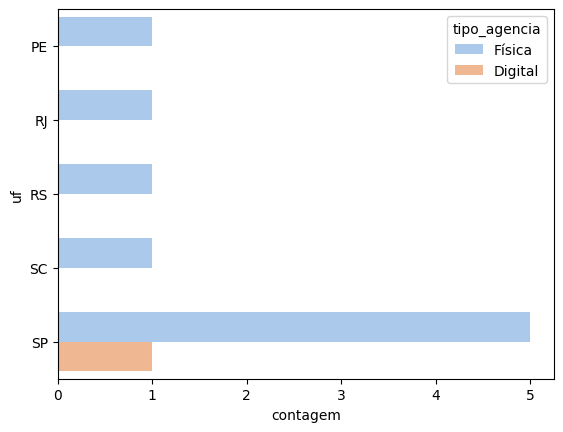

In [22]:
#contagem de agências
df_cont_agencia = df_agencias.groupby(['uf','tipo_agencia']).size().reset_index(name='contagem')


sns.barplot(data=df_cont_agencia,
              y = 'uf',
            x = 'contagem',
             hue = 'tipo_agencia',
             #dodge="auto",
             palette='pastel')

plt.show()

## Colaboradores por agência

Avaliemos a quantidade de colaboradores por agência.

In [23]:
df_colaboradores[['cod_colaborador','nome_completo']].groupby(['nome_completo']).count()

,cod_colaborador
nome_completo,
Agência Campinas - Campinas/SP,11
Agência Digital - São Paulo/SP,7
Agência Florianópolis - Florianópolis/SC,8
Agência Jardins - São Paulo/SP,7
Agência Matriz - São Paulo/SP,16
Agência Osasco - Osasco/SP,4
Agência Porto Alegre - Porto Alegre/RS,13
Agência Recife - Recife/PE,10
Agência Rio de Janeiro - Rio de Janeiro/RJ,11


No gráfico, temos que:

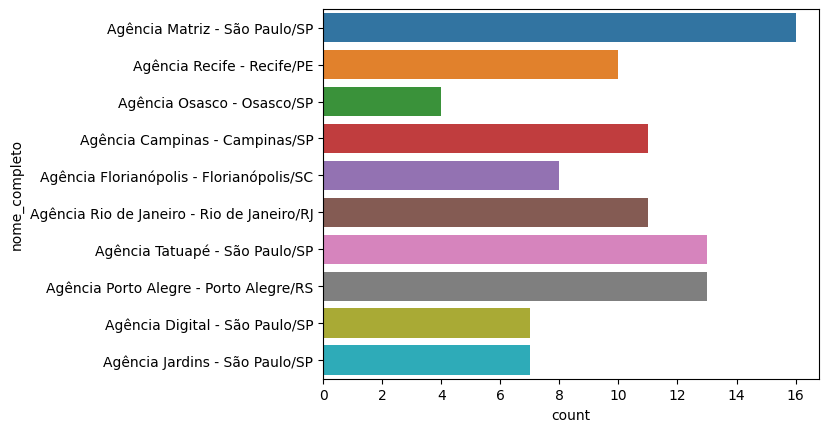

In [24]:
sns.countplot(data=df_colaboradores,
             y=df_colaboradores.nome_completo)
plt.show()

TEmos que a agência Matriz em São Paulo possui a maior quantidade de colaboradores.

## Quantidade de contas por agência

Plotando a quantidade de contas por agência, temos a seguinte visualização:

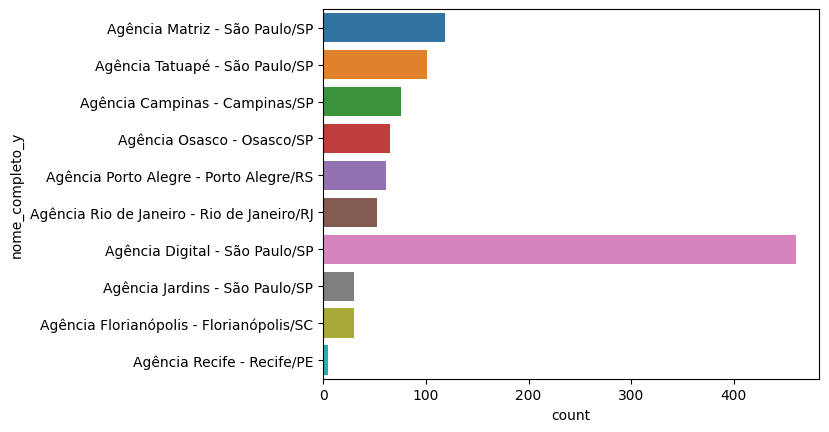

In [25]:
graf1= sns.countplot(data = df_contas_total,
                    y = 'nome_completo_y')
plt.show()

## Tempo de agencia em meses por quantidade de clientes

## KPI Eficiência da Agência (Clientes por Colaboradores)

Agora vamos avaliar a quantidade de colaboradores de cada agência e relacionar com a qauantidade de contas que cada agência possui.

Desta forma, objetivamos encontrar um indicador de eficiência.

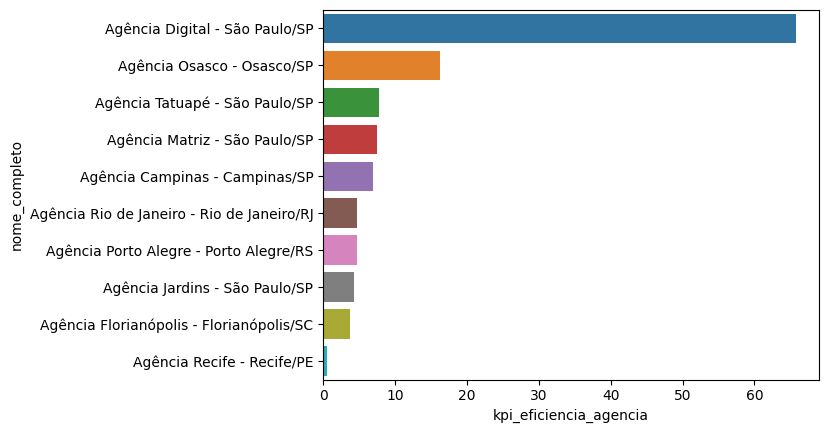

In [26]:
#conta colaboradores por agência
df_estatistica_eficiencia = df_colaboradores[['cod_colaborador','nome_completo']].groupby('nome_completo').count()
df_estatistica_eficiencia = df_estatistica_eficiencia.rename(columns = {'cod_colaborador': 'qtd_colaboradores'})

#conta contas por agência
df_estatistica_eficiencia['qtd_contas'] = df_contas_total[['nome_completo_y','num_conta']] .groupby('nome_completo_y').count()

#calcula indicador de eficiência
df_estatistica_eficiencia['kpi_eficiencia_agencia'] = df_estatistica_eficiencia.qtd_contas / df_estatistica_eficiencia.qtd_colaboradores
df_estatistica_eficiencia = df_estatistica_eficiencia.sort_values(by='kpi_eficiencia_agencia', ascending=False)
sns.barplot(x = df_estatistica_eficiencia.kpi_eficiencia_agencia,
            y =df_estatistica_eficiencia.index)
plt.show()

## Linha do tempo de Criação de contas

In [27]:
df_quant_contas = df_contas_total[['data_abertura_conta','num_conta','nome_completo_y',
                                   'data_abertura_agencia']].sort_values('data_abertura_conta')
df_quant_contas = df_quant_contas.rename(columns = {'nome_completo_y': 'nome_agencia'})

# calculando ano conta
df_quant_contas['ano_abertura_conta'] = df_quant_contas.data_abertura_conta.dt.year

# calculando ano agência
df_quant_contas['ano_abertura_agencia'] = df_quant_contas.data_abertura_agencia.dt.year


# Calculando quantidade de contas cumulativa
df_quant_contas['qtd_contas'] = None
df_quant_contas['qtd_contas'] = range(1, len(df_quant_contas) + 1)

df_quant_contas

,data_abertura_conta,num_conta,nome_agencia,data_abertura_agencia,ano_abertura_conta,ano_abertura_agencia,qtd_contas
93,2010-02-02 14:28:00+00:00,382,Agência Matriz - São Paulo/SP,2010-01-01,2010,2010,1
55,2010-03-09 12:09:00+00:00,6,Agência Matriz - São Paulo/SP,2010-01-01,2010,2010,2
23,2010-05-06 14:03:00+00:00,242,Agência Matriz - São Paulo/SP,2010-01-01,2010,2010,3
56,2010-06-21 16:42:00+00:00,620,Agência Matriz - São Paulo/SP,2010-01-01,2010,2010,4
73,2010-06-27 10:33:00+00:00,146,Agência Matriz - São Paulo/SP,2010-01-01,2010,2010,5
...,...,...,...,...,...,...,...
372,2022-12-17 16:43:00+00:00,223,Agência Porto Alegre - Porto Alegre/RS,2013-12-01,2022,2013,995
291,2022-12-18 13:37:00+00:00,416,Agência Campinas - Campinas/SP,2012-03-04,2022,2012,996
708,2022-12-19 14:37:00+00:00,315,Agência Digital - São Paulo/SP,2015-08-01,2022,2015,997
756,2022-12-22 10:05:00+00:00,133,Agência Digital - São Paulo/SP,2015-08-01,2022,2015,998


In [28]:
df_anos_agencias = df_quant_contas[['nome_agencia','ano_abertura_agencia','num_conta']].groupby(['nome_agencia','ano_abertura_agencia']).count().sort_values('ano_abertura_agencia')
df_anos_agencias


,,num_conta
nome_agencia,ano_abertura_agencia,
Agência Matriz - São Paulo/SP,2010,119
Agência Tatuapé - São Paulo/SP,2010,101
Agência Campinas - Campinas/SP,2012,76
Agência Osasco - Osasco/SP,2013,65
Agência Porto Alegre - Porto Alegre/RS,2013,61
Agência Digital - São Paulo/SP,2015,460
Agência Rio de Janeiro - Rio de Janeiro/RJ,2015,52
Agência Jardins - São Paulo/SP,2018,30
Agência Florianópolis - Florianópolis/SC,2019,30


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


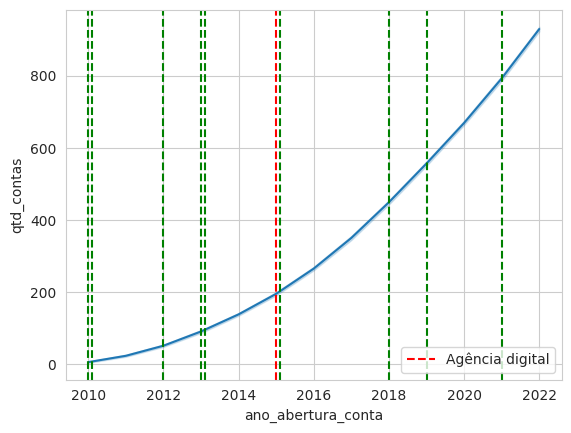

In [29]:
with sns.axes_style('whitegrid'):
    ax = sns.lineplot(data=df_quant_contas, x='ano_abertura_conta', y='qtd_contas')
    
    #linhas
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[0], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[0]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[1], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[2], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[2]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[3], color='red', linestyle='--', label='Agência digital')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[3]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[4], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[5], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[6], color='green', linestyle='--')

    ax.legend()
    plt.show()

Observa-se a aceleração da criação de contas a partir de 2015, quando foi criada a agência digital.

In [30]:
df_anos_contas = df_quant_contas[['ano_abertura_conta','num_conta']].groupby('ano_abertura_conta').count().sort_values('ano_abertura_conta')
df_anos_contas['crescimento'] = df_anos_contas['num_conta'].diff()
df_anos_contas

,num_conta,crescimento
ano_abertura_conta,,
2010,11,NaN
2011,24,13.0
2012,32,8.0
2013,47,15.0
2014,48,1.0
2015,66,18.0
2016,74,8.0
2017,96,22.0
2018,102,6.0


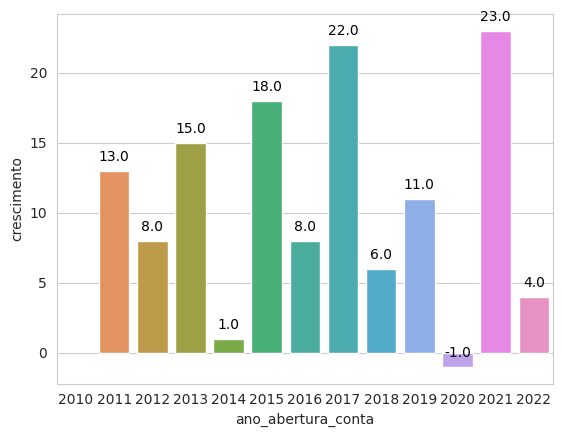

In [37]:
with sns.axes_style('whitegrid'):

    ax = sns.barplot(x=df_anos_contas.index,
                y=df_anos_contas.crescimento)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## KPI - crescimento da agência (tempo em meses x nº de contas)

Criando um indicador para analisar o crescimento da quantidade de contas por agência, considerando a idade em meses da agência

In [32]:
kpi_crescimento = df_contas_total[['nome_completo_y','tempo_agencia_meses','num_conta']].groupby(['nome_completo_y','tempo_agencia_meses']).count()

kpi_crescimento['kpi_crescimento_mensal'] = kpi_crescimento['num_conta'] / kpi_crescimento.index.get_level_values('tempo_agencia_meses')
kpi_crescimento = kpi_crescimento.sort_values('kpi_crescimento_mensal', ascending=False)
kpi_crescimento

,,num_conta,kpi_crescimento_mensal
nome_completo_y,tempo_agencia_meses,,
Agência Digital - São Paulo/SP,102,460,4.509804
Agência Matriz - São Paulo/SP,169,119,0.704142
Agência Tatuapé - São Paulo/SP,163,101,0.619632
Agência Florianópolis - Florianópolis/SC,52,30,0.576923
Agência Campinas - Campinas/SP,143,76,0.531469
Agência Osasco - Osasco/SP,123,65,0.528455
Agência Porto Alegre - Porto Alegre/RS,122,61,0.500000
Agência Rio de Janeiro - Rio de Janeiro/RJ,106,52,0.490566
Agência Jardins - São Paulo/SP,73,30,0.410959


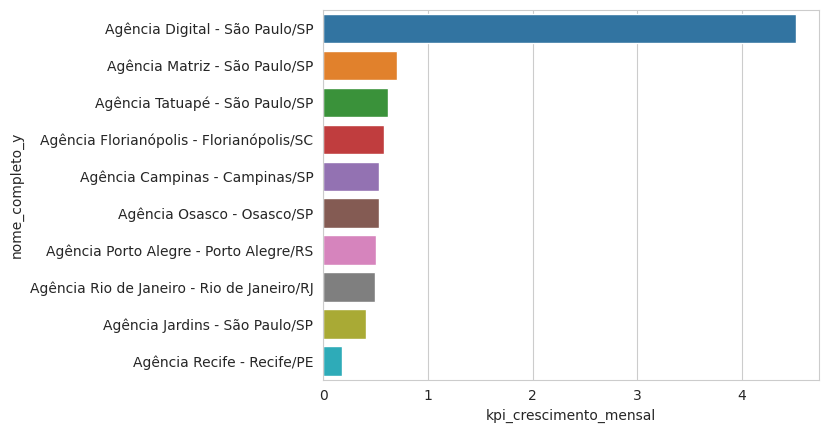

In [33]:
with sns.axes_style('whitegrid'):
    sns.barplot(x = kpi_crescimento.kpi_crescimento_mensal,
               y = kpi_crescimento.index.get_level_values('nome_completo_y'))
    plt.show()

Avalia-se portanto quão eficiente é uma agência digital e o potencial que este pode atingir no alcance de mais clientes.

## Avaliação de atividades das Contas

In [55]:
df_contas_total.columns


Index(['num_conta', 'cod_cliente', 'cod_agencia_x', 'cod_colaborador',
       'tipo_conta', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento_conta', 'data_abertura_conta', 'dias_inativo',
       'media_dias_atividade', 'nome', 'cidade', 'uf', 'tipo_agencia',
       'logradouro', 'no_logradouro', 'bairro', 'nome_completo_x',
       'data_abertura_agencia', 'tempo_agencia_meses', 'primeiro_nome',
       'ultimo_nome', 'email', 'cpf', 'data_nascimento', 'endereco', 'cep',
       'nome_completo_y', 'cod_agencia_y'],
      dtype='object')

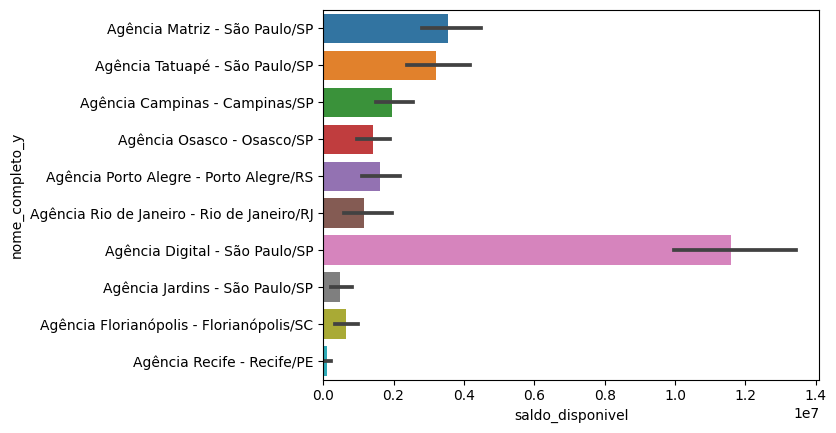

In [38]:
sns.barplot(data=df_contas_total,
            x = 'saldo_disponivel',
           y = 'nome_completo_y',
           estimator = 'sum',
           hue_order = 'saldo_disponivel')
plt.show()

## Avaliação de última movimentação

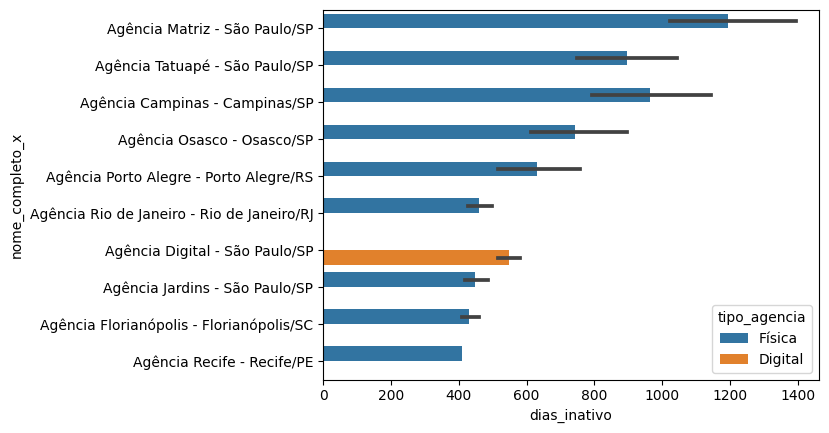

In [63]:
sns.barplot(x = df_contas_total.dias_inativo,
            y = df_contas_total.nome_completo_x,
            hue = df_contas_total.tipo_agencia)
plt.show()

In [70]:
df_agencias[['nome','data_abertura_agencia']].sort_values('data_abertura_agencia')

,nome,data_abertura_agencia
cod_agencia,,
1,Agência Matriz,2010-01-01
2,Agência Tatuapé,2010-06-14
3,Agência Campinas,2012-03-04
4,Agência Osasco,2013-11-06
5,Agência Porto Alegre,2013-12-01
6,Agência Rio de Janeiro,2015-04-01
7,Agência Digital,2015-08-01
8,Agência Jardins,2018-01-09
9,Agência Florianópolis,2019-10-09


# Dashboard

Através do [Painel dinâmico](https://lookerstudio.google.com/reporting/671aeb89-9fa4-4e31-bf11-be3ce048046c), é possível avaliar os dados. 

# Entregas

Nem todos os envolvidos estão convictos com a ideia de uma frente de BIs no BanVic. Como podemos convencer Camila Diniz, diretora comercial, que as nossas soluções serão úteis para a empresa? Com base na análise exploratória realizada nos dados apresentados, quais perguntas de negócio podemos responder para mostrar o valor que dados possuem para a empresa? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores citados nessa entrega.


Quais serão os indicadores ou visualizações utilizadas para responder às perguntas de negócio citadas anteriormente? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores citados nessa entrega.


Apresentar pelo menos duas análises de negócio para cada uma das categorias. Pergunta de nível teórico. O seu projeto final não necessariamente precisa ter todas análises citadas nessa entrega: 


- Uma análise descritiva;
- Uma análise diagnóstica;
- Uma análise prescritiva;
- Uma análise preditiva.


Um relatório em PDF com suas análises, justificativas e raciocínio contendo os seguintes pontos:
As respostas do item 1, 2 e 3.
Um tópico descrevendo brevemente quais os processos de transformação e tratamento de dados foram aplicados por você.
Um dashboard dos principais KPIs de negócio do BanVic permitindo um detalhamento por data, por agência e por clientes.
Apresentar as análises que foram necessárias para o entendimento do negócio e que podem ser úteis no suporte para a tomada de decisão.
E finalmente, com base nas suas análises, uma conclusão com recomendações/sugestões de negócio e encaminhamentos para a CEO do BanVic.
Apresentar e justificar as ferramentas adotadas para a elaboração das análises.
